# Data Preparation and Cleaning

The data used in this report comes from two sources: 
- Pollen data comes from The <a href="https://www.houstontx.gov/health/Pollen-Mold/pollen-archives.html">Houston Health Department website</a>
- Climate data comes from the the <a href="ncei.noaa.gov"> National Oceanic and Atmospheric Administration's (NOAA) National Center for Environmental Information (NCEI) </a>

Pollen Data was compiled from individual monthly spreadsheets from 2013 to 2022 consisting of pollen counts 

# Introduction and Business Understanding 
Allergies are a impact lives  everywhere, but esepcially in Texas, US. Central texas is notorious for severe allergies, but in reality this problem affects the whole state. The surprising thing about this is that most of texas is a desert without much flora to speak of. Houston, however is uniquly positioned in texas being relatively near the desert, the ocean, marshland and forest. 

Allergy seasons occur with consistent regularity throughout the year. Spring and fall are universally known as the worst times of the year for allergies due to pollen counts. Using weather and climate data to predict pollen counts is not particularly ground-breaking because this data is also seasonal. However, if seasonality is removed from the equation, does information such as local precipitation, temperature and wind speed still have an effect. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Business prob

#Data cleaning
The original data came from 

In [5]:
pollen_df = pd.read_csv('C://Users/Nick/Documents/Flatiron/capstone/data/all_pollen.csv')

In [6]:
pollen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         3377 non-null   object 
 1   Alder                        1068 non-null   float64
 2   Ash                          2358 non-null   float64
 3   Ashe Juniper / Bald Cypress  2358 non-null   float64
 4   Black Gum                    2358 non-null   float64
 5   Black Walnut                 2342 non-null   float64
 6   Bushes                       2358 non-null   float64
 7   Birch                        2358 non-null   float64
 8   Cedar                        832 non-null    float64
 9   Cotton Wood                  2358 non-null   float64
 10  Dogwood                      2358 non-null   float64
 11  Elm                          2358 non-null   float64
 12  Glandular Mesquite           2358 non-null   float64
 13   Hackberry        

In [7]:

pollen_df['DATE'] = pd.to_datetime(pollen_df['DATE'])

In [8]:
#some of the text data
pollen_df['DATE'] = pd.to_numeric(pollen_df['DATE'], errors = 'coerce')

In [9]:
pollen_df['DATE'] = pd.to_datetime(pollen_df['DATE'])

In [10]:
#setting the index as date time
pollen_df.set_index('DATE', drop=True, inplace=True)

In [11]:
#sorting the date index so it works well in our further manipulations
pollen_df = pollen_df.sort_index()

In [12]:
pollen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3377 entries, 2013-01-01 to 2022-03-31
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alder                        1068 non-null   float64
 1   Ash                          2358 non-null   float64
 2   Ashe Juniper / Bald Cypress  2358 non-null   float64
 3   Black Gum                    2358 non-null   float64
 4   Black Walnut                 2342 non-null   float64
 5   Bushes                       2358 non-null   float64
 6   Birch                        2358 non-null   float64
 7   Cedar                        832 non-null    float64
 8   Cotton Wood                  2358 non-null   float64
 9   Dogwood                      2358 non-null   float64
 10  Elm                          2358 non-null   float64
 11  Glandular Mesquite           2358 non-null   float64
 12   Hackberry                   2358 non-null   float64
 13  

As evindenced above, there are many missing values. The Technicians who measured pollen counts do not work on weekends or holidays. This is address further down in the cleaning. 

In [13]:
#all columns should be  numeric exepct tech
pollen_df['Willow'] = pd.to_numeric(pollen_df['Willow'], errors='coerce') 

pollen_df['Gingko Biloba'] = pd.to_numeric(pollen_df['Gingko Biloba'], errors='coerce') 

pollen_df['Privet'] = pd.to_numeric(pollen_df['Privet'], errors='coerce') 

In [14]:
! mkdir data

A subdirectory or file data already exists.


In [15]:
#
pollen_df.to_csv('data/pollen_df.csv')

### preliminary exploration 
taking a look at initial correlations to see the landscape of the data:

### Pulling in Data from Shreveport
Shreveport, Lousiana is located just over 200 miles fro Houston beyond a lusher forested area. We would like to see if weather indicators there have any greater or lesser impact on pollen counts than that of Houston proper.

In [16]:
shreveport_df = pd.read_csv('data/shreveport.csv')
shreveport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    3372 non-null   object 
 1   AWND    3350 non-null   float64
 2   PRCP    3372 non-null   float64
 3   TAVG    3372 non-null   float64
 4   WDF2    3372 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 131.8+ KB


In [17]:
#converting the 'DATE' column to the correct format
shreveport_df['DATE'] = pd.to_datetime(shreveport_df['DATE'])

In [18]:
combined_df = pollen_df.merge(shreveport_df, on='DATE')

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 3371
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         3372 non-null   datetime64[ns]
 1   Alder                        1064 non-null   float64       
 2   Ash                          2354 non-null   float64       
 3   Ashe Juniper / Bald Cypress  2354 non-null   float64       
 4   Black Gum                    2354 non-null   float64       
 5   Black Walnut                 2338 non-null   float64       
 6   Bushes                       2354 non-null   float64       
 7   Birch                        2354 non-null   float64       
 8   Cedar                        828 non-null    float64       
 9   Cotton Wood                  2354 non-null   float64       
 10  Dogwood                      2354 non-null   float64       
 11  Elm                          2354 non-null 

The number of columns is excessive so we remove snow and just keep averages of wind speed and temperature for which there are stronger correlations to pollen counts anyway as shown below:

In [20]:
combined_df = combined_df.drop(['SNOW_60', 'SNWD_60', 'TMAX_60', 'TMIN_60', 'WDF2_60', 'WDF5_60', 'WSF2_60', 'WSF5_60',
                                'SNOW_18', 'SNWD_18', 'TMAX_18','TMIN_18', 'WDF2_18', 'WDF5_18', 'WSF2_18', 'WSF5_18'], axis=1)

In [21]:
combined_df.columns

Index(['DATE', 'Alder', 'Ash', 'Ashe Juniper / Bald Cypress', 'Black Gum ',
       'Black Walnut', 'Bushes', 'Birch', 'Cedar', 'Cotton Wood', 'Dogwood',
       'Elm', 'Glandular Mesquite', ' Hackberry', 'Hickory', 'Mulberry',
       'Maple', 'Osage Orange', 'Oak', 'Sycamore', 'Pine', 'Privet',
       'Sweet Gum', 'Gingko Biloba', 'Magnolia', 'Willow', 'Tree Total',
       'Grass Total', 'Tree & Grass Total', 'Amaranth', 'Burweed / Marshelder',
       'Cattail', 'Dog Fennel', 'Lamb's Quarters', 'Nettle', 'Partridge Pea',
       'Pigweed', 'Plum Grannet', 'Ragweed', 'Rumex', 'Sagebrush', 'Saltbrush',
       'Sedge', 'Sneezeweed', 'Other Weed', 'Weed Total', 'Pollen Total',
       'Tech.', 'AWND_60', 'PRCP_60', 'TAVG_60', 'AWND_18', 'PRCP_18',
       'TAVG_18', 'AWND', 'PRCP', 'TAVG', 'WDF2'],
      dtype='object')

In [22]:
# the merge changed our index so we reset to datetime
combined_df.set_index('DATE', inplace=True, drop=True)

In [23]:
combined_df.sort_index(inplace=True)

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3372 entries, 2013-01-01 to 2022-03-31
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alder                        1064 non-null   float64
 1   Ash                          2354 non-null   float64
 2   Ashe Juniper / Bald Cypress  2354 non-null   float64
 3   Black Gum                    2354 non-null   float64
 4   Black Walnut                 2338 non-null   float64
 5   Bushes                       2354 non-null   float64
 6   Birch                        2354 non-null   float64
 7   Cedar                        828 non-null    float64
 8   Cotton Wood                  2354 non-null   float64
 9   Dogwood                      2354 non-null   float64
 10  Elm                          2354 non-null   float64
 11  Glandular Mesquite           2354 non-null   float64
 12   Hackberry                   2354 non-null   float64
 13  

In [25]:
# for clarity's sake change the names of the columns with information from shreveport by adding the suffix _S
combined_df[['AWND_S', 'PRCP_S', 'TAVG_S', 'WDF2_S']] = combined_df[['AWND', 'PRCP', 'TAVG', 'WDF2']]

In [26]:
combined_df = combined_df.drop(columns=['AWND', 'PRCP', 'TAVG', 'WDF2'])

It was decided to preserve a workable record of the data before imputing missing values to compare to the imputed data. This was done by upsampling the time series to weekly.

In [27]:
weekly_raw = combined_df.resample('W').mean()

# Feature Engineering and Imputing missing values
Weed, grass and tree pollens are interpreted differently in terms of severity. For instance, a 200 is a high count for grass pollen, and 1000 is a high count for tree pollen. Given that this is a classificcation project, binary columns for high and very high pollen counts are created. More information is given at the <a href= 'https://www.houstontx.gov/health/Pollen-Mold/numbers.html'>Houston Health Dept. website.</a>

In [28]:
#first missing values are interpolated linearly. Pollen Total in included to compare to the weighted pollen count
for total in ['Tree Total', 'Grass Total', 'Weed Total', 'Pollen Total']:
    combined_df[total] = combined_df[total].interpolate()

In [29]:
#feature engineering a weighted pollen column that accounts for severity of different
combined_df['pollen_weighted'] = combined_df['Tree Total'] + combined_df['Grass Total']*7.5 +combined_df['Weed Total']*3
weekly_raw['pollen_weighted'] = weekly_raw['Tree Total'] + weekly_raw['Grass Total']*7.5 + weekly_raw['Weed Total']*3

pollen counts above have been weighted based on "extremely heavy" rating for trees of 1500+ so this is chosen as the threshold for `super_high` pollen count in the classification columns. We assign ratings of very_high as somewhere in the middle, and high as the lower threshold for "heavy" pollen counts as follows

In [30]:
combined_df['super_high'] = (combined_df['pollen_weighted'] > 1500).astype(int)
combined_df['very_high'] = (combined_df['pollen_weighted'] > 500).astype(int)
combined_df['high'] = (combined_df['pollen_weighted']>100).astype(int)

weekly_raw['super_high'] = (weekly_raw['pollen_weighted'] > 1500).astype(int)
weekly_raw['very_high'] = (weekly_raw['pollen_weighted'] > 500).astype(int)
weekly_raw['high'] = (weekly_raw['pollen_weighted']>100).astype(int)

In [31]:
#checking class balances for each category for interpolated data
for lvl in ['high', 'very_high', 'super_high']:
    print(combined_df[lvl].value_counts()) 
    print(combined_df[lvl].value_counts(normalize=True))

1    1771
0    1601
Name: high, dtype: int64
1    0.525208
0    0.474792
Name: high, dtype: float64
0    2697
1     675
Name: very_high, dtype: int64
0    0.799822
1    0.200178
Name: very_high, dtype: float64
0    3151
1     221
Name: super_high, dtype: int64
0    0.93446
1    0.06554
Name: super_high, dtype: float64


In [32]:
#checking class balances for each category for non-imputed data
for lvl in ['high', 'very_high', 'super_high']:
    print(weekly_raw[lvl].value_counts()) 
    print(weekly_raw[lvl].value_counts(normalize=True))

1    280
0    203
Name: high, dtype: int64
1    0.57971
0    0.42029
Name: high, dtype: float64
0    379
1    104
Name: very_high, dtype: int64
0    0.784679
1    0.215321
Name: very_high, dtype: float64
0    455
1     28
Name: super_high, dtype: int64
0    0.942029
1    0.057971
Name: super_high, dtype: float64


In comparing the breakdowns of our imputed and unimputed data, the class breakdown for each level of severity is roughly the same. This provides enough confidence that the imputed data can be used moving forward. We name it and save it as a new master dataset below

In [33]:
master_df = combined_df.copy()

In [34]:
master_df = master_df.asfreq('D')

In [35]:
master_df.to_csv('data/master_df.csv')

# Data Exploration
the bulk of preliminary data exploration can be found <a href='www.google.com'> here in a separate notebook.</a> Below shows the highlights as well as the most pertinent findings for this report. 

For the purpose of modeling the individual species will be ignored for now and explored in "Further Considerations" Towards the end of the report.

In [36]:
master_df.columns

Index(['Alder', 'Ash', 'Ashe Juniper / Bald Cypress', 'Black Gum ',
       'Black Walnut', 'Bushes', 'Birch', 'Cedar', 'Cotton Wood', 'Dogwood',
       'Elm', 'Glandular Mesquite', ' Hackberry', 'Hickory', 'Mulberry',
       'Maple', 'Osage Orange', 'Oak', 'Sycamore', 'Pine', 'Privet',
       'Sweet Gum', 'Gingko Biloba', 'Magnolia', 'Willow', 'Tree Total',
       'Grass Total', 'Tree & Grass Total', 'Amaranth', 'Burweed / Marshelder',
       'Cattail', 'Dog Fennel', 'Lamb's Quarters', 'Nettle', 'Partridge Pea',
       'Pigweed', 'Plum Grannet', 'Ragweed', 'Rumex', 'Sagebrush', 'Saltbrush',
       'Sedge', 'Sneezeweed', 'Other Weed', 'Weed Total', 'Pollen Total',
       'Tech.', 'AWND_60', 'PRCP_60', 'TAVG_60', 'AWND_18', 'PRCP_18',
       'TAVG_18', 'AWND_S', 'PRCP_S', 'TAVG_S', 'WDF2_S', 'pollen_weighted',
       'super_high', 'very_high', 'high'],
      dtype='object')

In [37]:
#isolating the columns to be considered for modeling and checking 
main_df = master_df[list(master_df.columns[-16:])]
main_df.tail()

,Pollen Total,Tech.,AWND_60,PRCP_60,TAVG_60,AWND_18,PRCP_18,TAVG_18,AWND_S,PRCP_S,TAVG_S,WDF2_S,pollen_weighted,super_high,very_high,high
DATE,,,,,,,,,,,,,,,,
2022-03-27,1742.666667,off,8.95,0.00,72.0,10.96,0.00,70.0,6.04,0.00,65.5,200.0,1871.0,1.0,1.0,1.0
2022-03-28,1886.000000,TL,8.95,0.00,72.0,12.08,0.00,71.0,8.50,0.00,67.5,180.0,2047.0,1.0,1.0,1.0
2022-03-29,1866.000000,RP,17.00,0.00,74.0,17.00,0.00,74.0,14.76,0.00,74.0,170.0,1990.0,1.0,1.0,1.0
2022-03-30,2376.000000,TL,14.32,0.38,74.0,15.21,0.45,74.0,12.53,0.54,62.5,300.0,2486.0,1.0,1.0,1.0
2022-03-31,5163.000000,TL,5.14,0.00,63.0,7.38,0.00,65.0,6.04,0.00,55.5,270.0,5235.0,1.0,1.0,1.0


In [38]:
main_df.describe()

,Pollen Total,AWND_60,PRCP_60,TAVG_60,AWND_18,PRCP_18,TAVG_18,AWND_S,PRCP_S,TAVG_S,WDF2_S,pollen_weighted,super_high,very_high,high
count,3372.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3350.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000
mean,269.149318,7.496399,0.153845,70.201097,8.034180,0.156935,71.247715,6.505012,0.135380,66.462782,186.381969,389.234282,0.065540,0.200178,0.525208
std,678.573200,3.097958,0.592509,12.940881,3.234652,0.587248,12.481789,2.929793,0.419526,15.995824,96.488726,756.225994,0.247513,0.400193,0.499438
min,0.000000,0.890000,0.000000,21.000000,0.670000,0.000000,22.000000,0.220000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,5.140000,0.000000,61.000000,5.590000,0.000000,63.000000,4.250000,0.000000,54.500000,130.000000,36.000000,0.000000,0.000000,0.000000
50%,38.000000,6.930000,0.000000,73.000000,7.610000,0.000000,74.000000,6.040000,0.000000,68.500000,180.000000,111.000000,0.000000,0.000000,1.000000
75%,190.000000,9.170000,0.020000,81.000000,9.840000,0.030000,82.000000,8.500000,0.020000,80.500000,260.000000,367.000000,0.000000,0.000000,1.000000
max,9074.000000,23.490000,16.070000,91.000000,24.160000,12.070000,90.000000,17.000000,5.340000,94.000000,360.000000,9230.000000,1.000000,1.000000,1.000000


In [39]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3377 entries, 2013-01-01 to 2022-03-31
Freq: D
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pollen Total     3372 non-null   float64
 1   Tech.            3372 non-null   object 
 2   AWND_60          3282 non-null   float64
 3   PRCP_60          3282 non-null   float64
 4   TAVG_60          3282 non-null   float64
 5   AWND_18          3282 non-null   float64
 6   PRCP_18          3282 non-null   float64
 7   TAVG_18          3282 non-null   float64
 8   AWND_S           3350 non-null   float64
 9   PRCP_S           3372 non-null   float64
 10  TAVG_S           3372 non-null   float64
 11  WDF2_S           3372 non-null   float64
 12  pollen_weighted  3372 non-null   float64
 13  super_high       3372 non-null   float64
 14  very_high        3372 non-null   float64
 15  high             3372 non-null   float64
dtypes: float64(15), object(1)
memory u

Now before modeling the dataframe needs to be further cleaned.  the first 3 months of 2013 are missing for the weather data from Houston, then completing the datetime index, lastly imputing any missing values that arise from the previous step.

In [40]:
#first dropping the first 3 months of 2013, then ensuring a full datetime index, then imputing missing values
main_df = main_df.dropna(subset=['PRCP_18']).asfreq('D').interpolate()

In [41]:
# correcting the targets after the interpolation
for lvl in ['high', 'very_high', 'super_high']:
    main_df[lvl] = round(main_df[lvl])

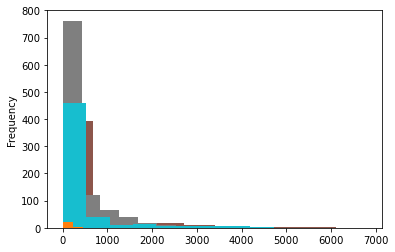

In [42]:
for tech in set(main_df['Tech.'].values):
    if tech != 'off':
        main_df[main_df['Tech.']==tech]['pollen_weighted'].plot(kind='hist')

In [43]:
main_df.drop('Tech.', axis=1, inplace=True)

<AxesSubplot:>

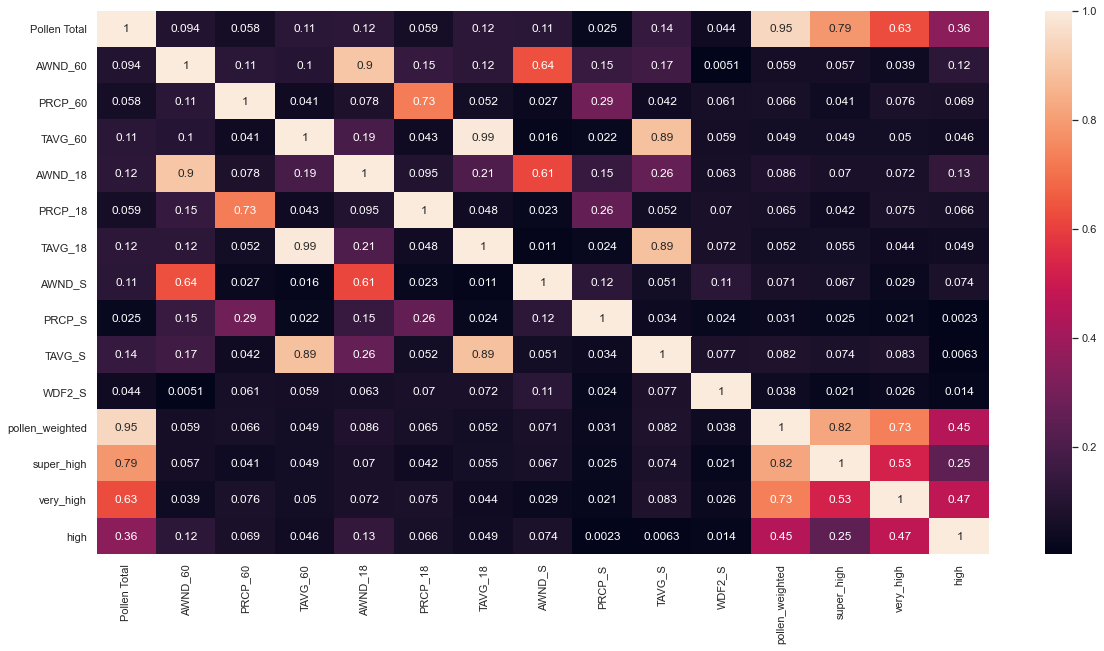

In [44]:
sns.set(rc = {'figure.figsize': (20,10)})
sns.heatmap(main_df.corr().abs(), annot=True)

<AxesSubplot:>

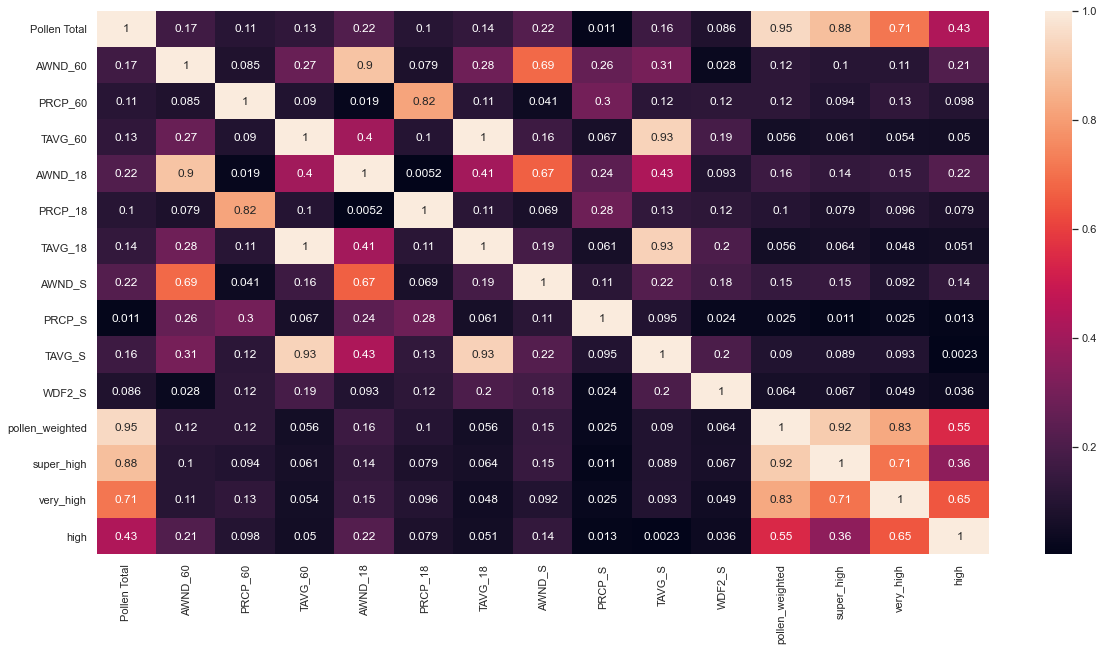

In [45]:
sns.heatmap(main_df.resample('W').mean().corr().abs(), annot=True)

# Modeling With Seasonality
The modeling portion of this report will consist of two parts: Classification and Time Series forecasting. Given that all of the variables appear to have seasonality. The correlations shown so far are likely merely a consequence of that. The question this report first hopes to address is if, with all trends removed, can a classification model such as logistic regression with these variables outperform a dummy classifier. 

The next question, much simpler, relies on this seasonality to forecast pollen levels reliably for Houston. While this is not a classifiction model, the predicted pollen counts are the basis for the classification targets and thus can be applied directly. 

The forecasting could then be applied to the further considerations, where, as proof of concept, artificial customers and medication purchases are generated to show how species data can be used as a diagnostic tool for allergen identification.

### Seasonal Decomposition
given the high seasonlity of both target and variables, the first step is to remove that dependence from the data.

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_pollen = seasonal_decompose(main_df['pollen_weighted'].resample('D').mean(), extrapolate_trend='freq', period=365)

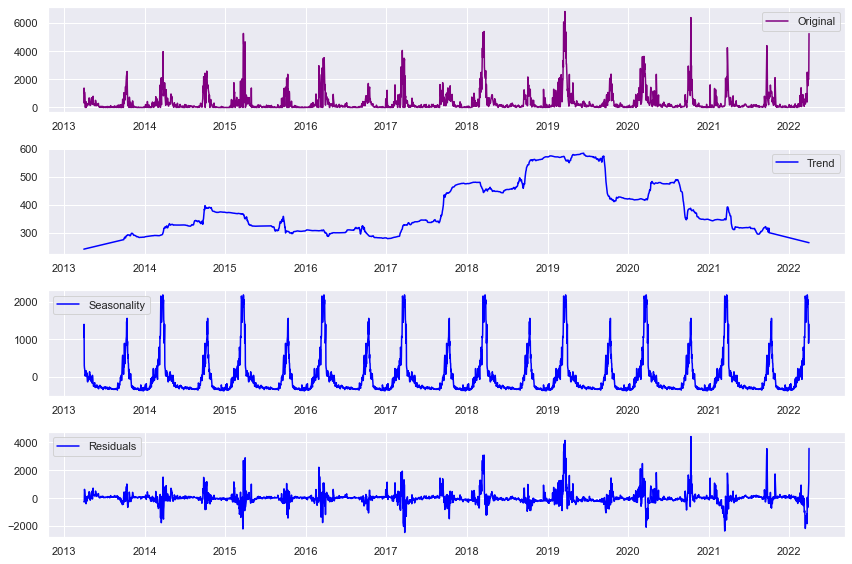

In [47]:
trend = decomp_pollen.trend
seasonal = decomp_pollen.seasonal
residual = decomp_pollen.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(main_df['pollen_weighted'], label='Original', color='purple')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

The point here is to *only* remove the seasonal component

In [49]:
# 
df_resid = main_df.resample('D').mean().apply(lambda x: seasonal_decompose(x, extrapolate_trend='freq').resid)
df_trend = main_df.resample('D').mean().apply(lambda x: seasonal_decompose(x, extrapolate_trend='freq').trend)
df_resid_trend = df_resid+df_trend
df_resid_trend.head()

,Pollen Total,AWND_60,PRCP_60,TAVG_60,AWND_18,PRCP_18,TAVG_18,AWND_S,PRCP_S,TAVG_S,WDF2_S,pollen_weighted,super_high,very_high,high
DATE,,,,,,,,,,,,,,,
2013-04-01,1048.514526,5.914885,-0.008414,66.933203,5.667954,-0.032124,66.984706,2.386748,0.007795,62.922404,166.624599,1048.726374,0.002916,1.017801,1.049086
2013-04-02,1338.693762,9.761012,1.477976,66.697510,9.833483,1.541333,67.726076,6.978422,0.146503,60.199168,31.521255,1376.210161,-0.000329,1.000715,0.970265
2013-04-03,262.162264,10.361799,0.186130,62.853329,12.158925,0.130491,63.810673,8.355177,0.151698,44.858693,44.367760,274.709630,-0.012520,-0.001565,0.997827
2013-04-04,1052.126115,10.916316,0.011303,53.084017,12.678216,0.033528,54.034240,6.287265,-0.019696,44.146226,313.112875,1068.899805,-0.016200,0.987970,0.972295
2013-04-05,898.697720,4.486033,0.013859,56.236680,5.552705,0.034395,57.214809,1.231493,0.010017,53.150191,40.088155,947.287547,0.002010,0.996126,1.014880


In [50]:
df_resid = df_resid.drop(columns=['super_high', 'very_high', 'high'])
df_resid_trend = df_resid_trend.drop(columns=['super_high', 'very_high', 'high'])
target_df=main_df[['super_high','very_high','high']]

In [51]:
target_df['high'].value_counts()

1.0    1719
0.0    1568
Name: high, dtype: int64

In [52]:
model_resid = pd.concat([df_resid,target_df], axis=1)
model_wtrend = pd.concat([df_resid_trend,target_df], axis=1)

<AxesSubplot:>

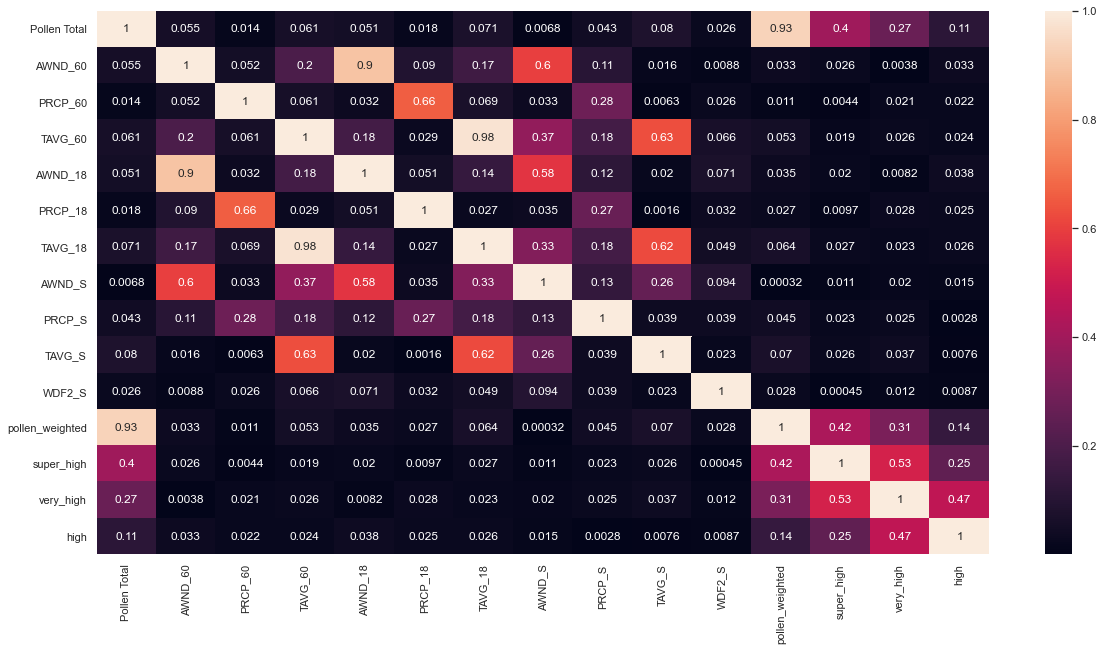

In [53]:
sns.heatmap(model_resid.corr().abs(), annot=True)

having removed seasonality, it is evident that there are know exceptionally strong correlations between pollen levels and the weather realted variables. Nonetheless, the point of this report is to provide a classification model

In [54]:
# preparing the train/test split for logistic regression
X = model_resid.drop(columns=['Pollen Total', 'pollen_weighted', 'super_high', 'very_high', 'high'])
y= model_resid['high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

## Baseline Dummy Classifier
A dummy classifier that chooses the majority class is used as the baseline model

In [55]:
baseline_model = DummyClassifier(random_state=85, strategy='most_frequent')

baseline_model.fit(X_train,y_train)

DummyClassifier(random_state=85, strategy='most_frequent')

In [56]:
baseline_model.score(X_test,y_test)

0.5121580547112462

51% accurate, 

## First Logistic Regression
first employed will be a standard logistic regression model without the bells and whistles. Data will be scaled.

In [57]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [58]:
lr1 = LogisticRegression(random_state=85, C=10)

lr1.fit(X_train_sc, y_train)
lr1.score(X_test_sc, y_test)

0.5121580547112462

The logisitic regression does **no** better than the dummy classifier. This is not entirely surprising given the week correlations. It makes sense to switch gears and move on to another machine learning model that might best the baseline.

## First Decision Tree
The next model tried is decision tree model with a max depth of 4

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt1 = DecisionTreeClassifier(max_depth=4)
dt1.fit(X_train_sc, y_train)
dt1.score(X_test_sc, y_test)

0.5547112462006079

With 55% accuracy, the decision tree has successfully outperformed the dummy, but only just. It hints that there may be a slightly more than random relationship between the chosen variables and airborne pollen levels. 

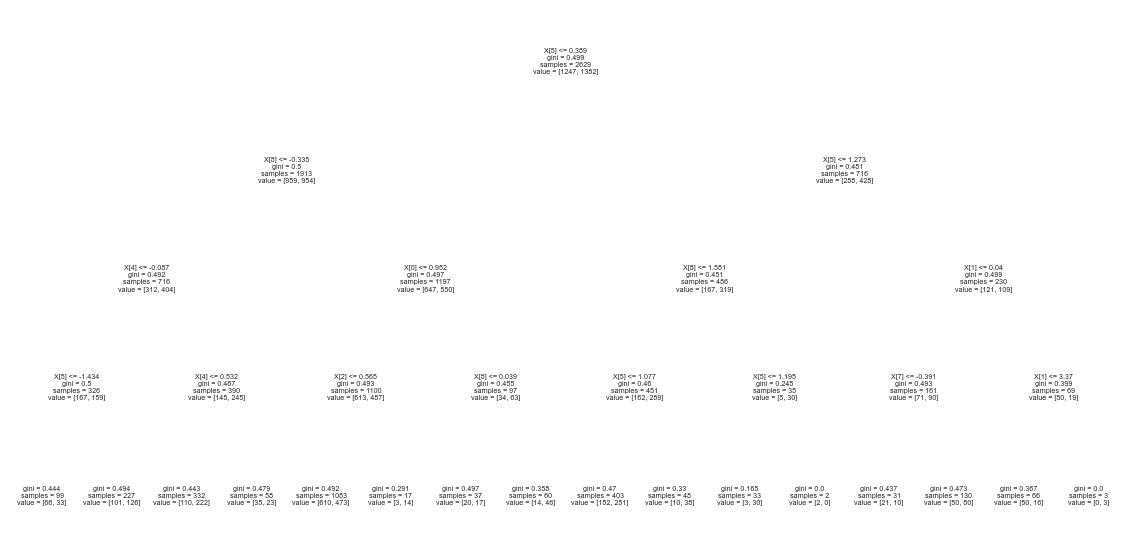

In [62]:
plot_tree(dt1);

This decision tree still has temperature in houston as the most important feature. This may still suggest that there is seasonlity influencing the result. However, it also may point to other phenomena such as the effect of temperature on air pressure and air currents and convection effects that lift pollen towards the upper atmosphere. Houston wind speed and precipitation were the next most important features according to this particular model. It is prudent to explore the parameters a decision tree model in order to maximize accuracy, yet given the relative success of the single decision tree, it bears to reason that multiple decision trees might perform even better. The scale of the data is not large, so a Random Forest Classifier is used next.

## First Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(random_state=85)
rfc1.fit(X_train_sc, y_train)
rfc1.score(X_test_sc, y_test)

0.5851063829787234

Assumptions were correct and the Random Forest is the best classifier so far in terms of accuracy. Now to tweak the parameters to find the best match using a grid search

In [ ]:
 param_grid = {
      'n_estimators':[50, 100, 500],
      'criterion':['gini', 'entropy'], 
      'max_depth':[2, 4, 10, 20, None],
      'min_samples_leaf':[1, 5, 10, 50, 100]
 }
    
gridsearch= GridSearchCV(estimator=RandomForestClassifier(random_state=85),
                  param_grid=param_grid,
                  cv=10,
                  )

grid_results = gridsearch.fit(X_train_sc, y_train)

In [79]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'n_estimators': 500}

the grid search has provided the best paramaters (shown above) for the random forest classifier and will be implemented in the final model below
## Final Model: Random Forest Classifier


In [82]:
rfc_final = RandomForestClassifier(random_state=85, criterion='gini', max_depth=10, min_samples_leaf=10, n_estimators=500)

rfc_final.fit(X_train_sc, y_train)
rfc_final.score(X_test_sc, y_test)

0.5668693009118541

# Further Considerations: Species Analysis
An Additional goal of this report, intended primarily for further research is a comprehensive breakdown of plant (and eventually mold) species. The goal being to work with pharmacies and customers to match days of purchase and usage of allergy medications to spikes in pollen counts. This could be used a diagnostic support tool for allergy-type identification.  More detailed, yet still preliminary work can be found <a href='www.google.com'>here</a> 

# Conclusion